Saving LBAT3-datatable (1).csv to LBAT3-datatable (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63445 entries, 0 to 63444
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       63445 non-null  object 
 1   RA_o     63445 non-null  float64
 2   Dec_o    63445 non-null  float64
 3   z_o      63445 non-null  float64
 4   uMag_o   63445 non-null  float64
 5   gMag_o   63445 non-null  float64
 6   rMag_o   63445 non-null  float64
 7   iMag_o   63445 non-null  float64
 8   zMag_o   63445 non-null  float64
 9   rR50_o   63445 non-null  float64
 10  rR90_o   63445 non-null  float64
 11  rConc_o  63445 non-null  float64
dtypes: float64(11), object(1)
memory usage: 5.8+ MB
None
       ID        RA_o     Dec_o       z_o     uMag_o     gMag_o     rMag_o  \
0   nyu35  353.910099 -0.836830  0.059277  17.965454  16.576340  15.912670   
1   nyu56    0.583248 -0.830124  0.076078  19.965660  18.097757  17.355344   
2  nyu102

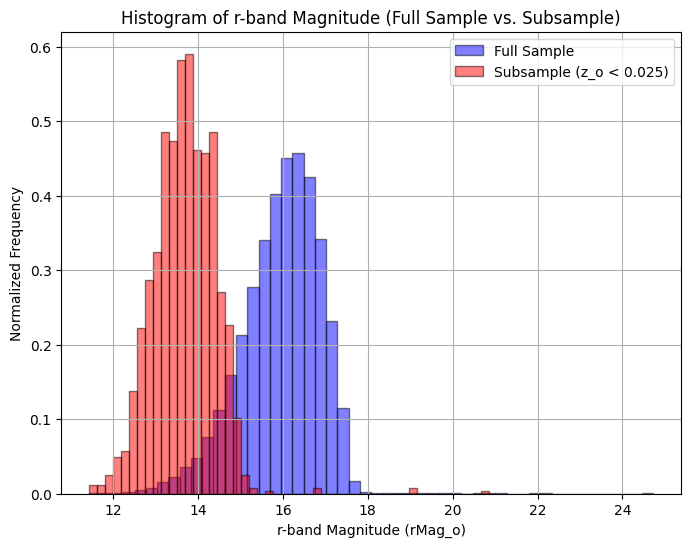

IndexError: single positional indexer is out-of-bounds

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from IPython.display import display, Image

# Load the dataset from Google Drive or local file
from google.colab import files

uploaded = files.upload()  # Upload LBAT3-datatable.csv when prompted

# Read the uploaded file
df = pd.read_csv("LBAT3-datatable (1).csv")

# Display basic info about the dataset
print(df.info())
print(df.head())

# Define subsample based on redshift condition (z_o < 0.025)
subsample = df[df["z_o"] < 0.025]

# Create histogram comparing full sample vs. subsample
plt.figure(figsize=(8, 6))
plt.hist(df["rMag_o"], bins=50, alpha=0.5, label="Full Sample", color="blue", edgecolor="black", density=True)
plt.hist(subsample["rMag_o"], bins=50, alpha=0.5, label="Subsample (z_o < 0.025)", color="red", edgecolor="black", density=True)

# Labels and title
plt.xlabel("r-band Magnitude (rMag_o)")
plt.ylabel("Normalized Frequency")
plt.title("Histogram of r-band Magnitude (Full Sample vs. Subsample)")
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Identify extreme and typical galaxies
brightest_galaxy = df.loc[df["rMag_o"].idxmin()]  # Brightest galaxy (lowest rMag_o)
faintest_galaxy = df.loc[df["rMag_o"].idxmax()]   # Faintest galaxy (highest rMag_o)
typical_galaxy = subsample.iloc[(subsample["rMag_o"] - subsample["rMag_o"].median()).abs().idxmin()]  # Closest to median of subsample

# Print details of the selected galaxies
print("Brightest Galaxy (Lowest rMag_o):\n", brightest_galaxy, "\n")
print("Faintest Galaxy (Highest rMag_o):\n", faintest_galaxy, "\n")
print("Typical Galaxy (Closest to Median rMag_o in Subsample):\n", typical_galaxy, "\n")

# Function to fetch SDSS image cutouts
def fetch_sdss_image(ra, dec):
    url = f"https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?ra={ra}&dec={dec}&scale=0.2&width=200&height=200"
    return url

# Display SDSS images of the selected galaxies
for galaxy, name in zip([brightest_galaxy, faintest_galaxy, typical_galaxy],
                        ["Brightest Galaxy", "Faintest Galaxy", "Typical Galaxy"]):
    img_url = fetch_sdss_image(galaxy["RA_o"], galaxy["Dec_o"])
    print(f"{name} (RA: {galaxy['RA_o']}, Dec: {galaxy['Dec_o']})")
    display(Image(url=img_url))

Saving LBAT3-datatable (1).csv to LBAT3-datatable (1).csv


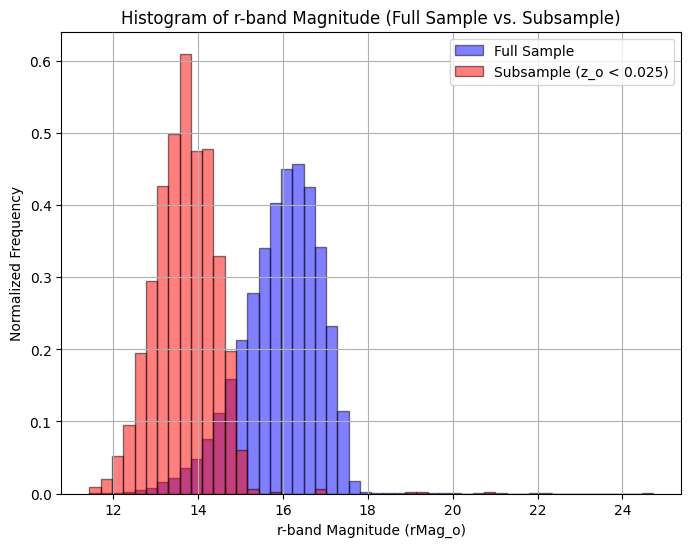

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from IPython.display import display, Image

# Load the dataset from Google Drive or local file
from google.colab import files

uploaded = files.upload()  # Upload LBAT3-datatable.csv when prompted

# Read the uploaded file
df = pd.read_csv("LBAT3-datatable (1).csv")

# Define the chosen parameter (rMag_o) and subsample
parameter = "rMag_o"
subsample = df[df["z_o"] < 0.025][parameter]

# Set up binning to ensure both histograms align
bins = np.histogram(df[parameter], bins=50)[1]  # Use the same bin edges for both histograms

# Create histogram comparing full sample vs. subsample
plt.figure(figsize=(8, 6))
plt.hist(df[parameter], bins=bins, alpha=0.5, label="Full Sample", color="blue", edgecolor="black", density=True)
plt.hist(subsample, bins=bins, alpha=0.5, label="Subsample (z_o < 0.025)", color="red", edgecolor="black", density=True)

# Labels and title
plt.xlabel("r-band Magnitude (rMag_o)")
plt.ylabel("Normalized Frequency")
plt.title("Histogram of r-band Magnitude (Full Sample vs. Subsample)")
plt.legend()
plt.grid()

# Show the plot
plt.show()

Saving LBAT3-datatable (1).csv to LBAT3-datatable (1) (1).csv


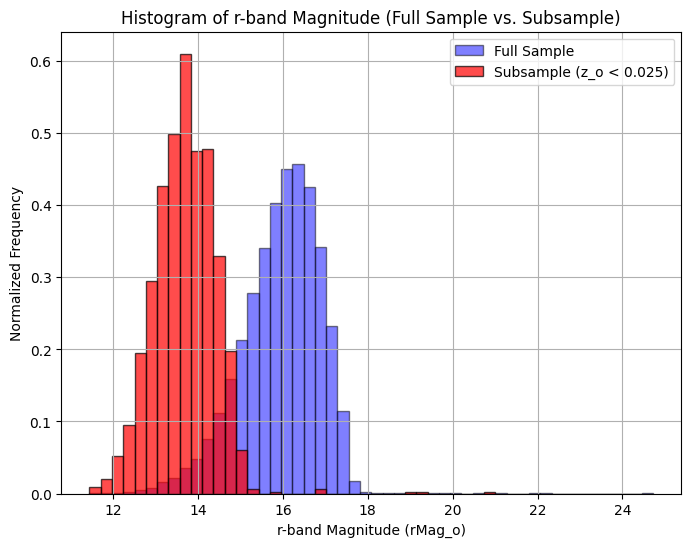

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from IPython.display import display, Image

# Load the dataset from Google Drive or local file
from google.colab import files

uploaded = files.upload()  # Upload LBAT3-datatable.csv when prompted

# Read the uploaded file
df = pd.read_csv("LBAT3-datatable (1).csv")

# Add a binary flag for low redshift
df["LowRedshift"] = (df["z_o"] < 0.025).astype(int)

# Save the updated dataset
df.to_csv("LBAT3-datatable-updated.csv", index=False)

# Define the chosen parameter (rMag_o)
parameter = "rMag_o"

# Define subsample based on redshift condition (z_o < 0.025)
subsample = df[df["z_o"] < 0.025][parameter]  # This just filters, not creating new values

# Set up binning to ensure both histograms align
bins = np.histogram(df[parameter], bins=50)[1]  # Get the bin edges from the full sample

# Create histogram comparing full sample vs. subsample
plt.figure(figsize=(8, 6))

# Plot the full sample in blue
plt.hist(df[parameter], bins=bins, alpha=0.5, label="Full Sample", color="blue", edgecolor="black", density=True)

# Plot the subsample *on top* in red
plt.hist(subsample, bins=bins, alpha=0.7, label="Subsample (z_o < 0.025)", color="red", edgecolor="black", density=True)

# Labels and title
plt.xlabel("r-band Magnitude (rMag_o)")
plt.ylabel("Normalized Frequency")
plt.title("Histogram of r-band Magnitude (Full Sample vs. Subsample)")

# Add legend and grid
plt.legend()
plt.grid()

# Show the plot
plt.show()

       ID        RA_o     Dec_o       z_o     uMag_o     gMag_o     rMag_o  \
0   nyu35  353.910099 -0.836830  0.059277  17.965454  16.576340  15.912670   
1   nyu56    0.583248 -0.830124  0.076078  19.965660  18.097757  17.355344   
2  nyu102    7.693071 -0.824861  0.059883  18.244411  16.965291  16.355352   
3  nyu135   14.013945 -0.828075  0.044462  17.453119  15.678264  14.916183   
4  nyu140   14.251412 -0.825226  0.048748  17.468944  15.695372  14.962056   

      iMag_o     zMag_o    rR50_o     rR90_o  rConc_o  
0  15.558900  15.289125  2.046399   6.929335    3.386  
1  16.998736  16.677590  1.266189   3.443345    2.719  
2  16.064676  15.802251  2.985400   8.368415    2.803  
3  14.579236  14.285124  2.533656   7.625317    3.010  
4  14.602007  14.308099  3.940991  11.848447    3.006  


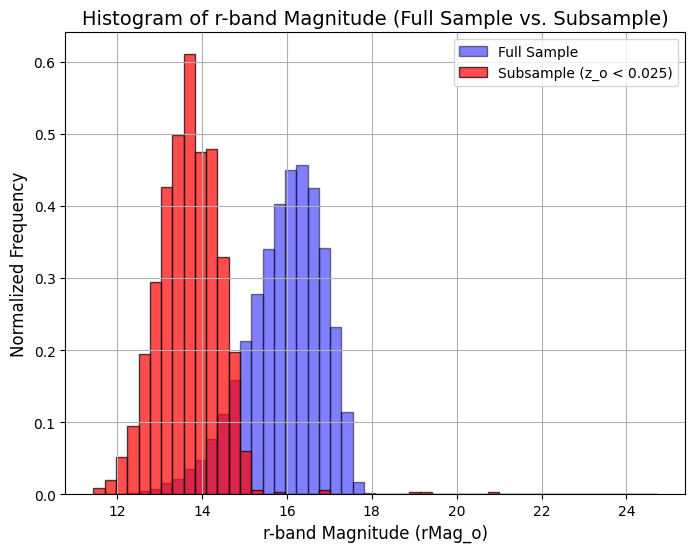

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (update filename if needed)
file_path = "LBAT3-datatable (1).csv"  # Update if filename is different
df = pd.read_csv(file_path)

# Inspect the first few rows to check column names
print(df.head())

# Ensure we are using correct column names (update if needed)
redshift_column = "z_o"  # Redshift column name
magnitude_column = "rMag_o"  # Column for r-band magnitude (update if necessary)

# Add a binary flag for galaxies with z_o < 0.025
df["LowRedshift"] = (df[redshift_column] < 0.025).astype(int)

# Save the updated dataset (optional)
df.to_csv("LBAT3-datatable-updated.csv", index=False)

# Extract full sample and subsample using the flag
full_sample = df[magnitude_column]
low_redshift_sample = df[df["LowRedshift"] == 1][magnitude_column]

# Define consistent bins based on full sample
bins = np.histogram(full_sample, bins=50)[1]

# Plot histogram with overlayed subsample
plt.figure(figsize=(8, 6))
plt.hist(full_sample, bins=bins, alpha=0.5, label="Full Sample", color="blue", edgecolor="black", density=True)
plt.hist(low_redshift_sample, bins=bins, alpha=0.7, label="Subsample (z_o < 0.025)", color="red", edgecolor="black", density=True)

# Formatting
plt.xlabel("r-band Magnitude (rMag_o)", fontsize=12)
plt.ylabel("Normalized Frequency", fontsize=12)
plt.title("Histogram of r-band Magnitude (Full Sample vs. Subsample)", fontsize=14)
plt.legend()
plt.grid()

# Show the plot
plt.show()

<ipython-input-4-3b6dd341563d>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Or any other colormap you prefer


ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 50 colors were provided

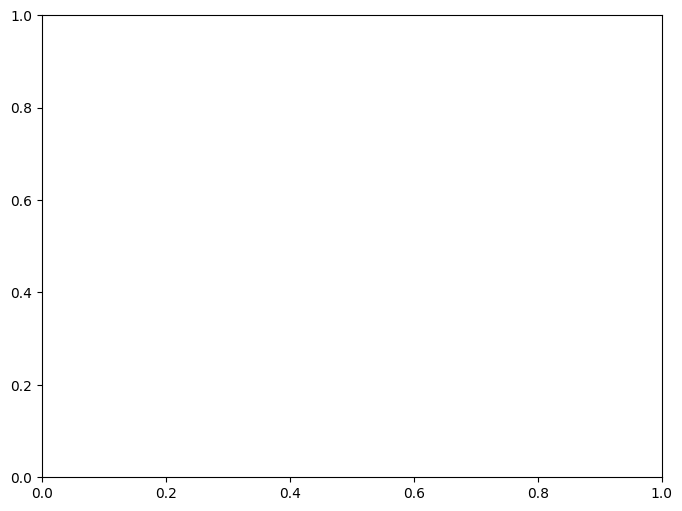

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = "LBAT3-datatable (1).csv"
df = pd.read_csv(file_path)

# Define column names
redshift_column = "z_o"
magnitude_column = "rMag_o"

# Define consistent bins based on the full sample
bins = np.histogram(df[magnitude_column], bins=50)[1]

# Calculate the fraction of low redshift galaxies in each bin
fractions = []
for i in range(len(bins) - 1):
    bin_data = df[(df[magnitude_column] >= bins[i]) & (df[magnitude_column] < bins[i + 1])]
    fraction = len(bin_data[bin_data[redshift_column] < 0.025]) / len(bin_data) if len(bin_data) > 0 else 0
    fractions.append(fraction)

# Create a colormap based on the fractions
cmap = plt.cm.get_cmap('viridis')  # Or any other colormap you prefer
colors = cmap(fractions)

# Plot the histogram with color-coded bins
plt.figure(figsize=(8, 6))
plt.hist(df[magnitude_column], bins=bins, color=colors, edgecolor="black", density=True)

# Formatting
plt.xlabel("r-band Magnitude (rMag_o)", fontsize=12)
plt.ylabel("Normalized Frequency", fontsize=12)
plt.title("Histogram of r-band Magnitude with Redshift Subset", fontsize=14)
plt.colorbar(label="Fraction of Galaxies with z_o < 0.025")  # Add colorbar
plt.grid()

# Show the plot
plt.show()

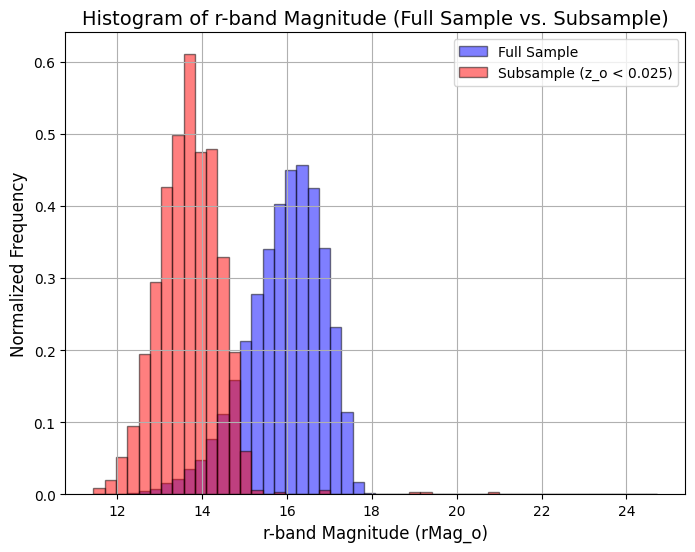

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
file_path = "LBAT3-datatable (1).csv"
df = pd.read_csv(file_path)

# Define column names
redshift_column = "z_o"
magnitude_column = "rMag_o"

# Define consistent bins based on the full sample
bins = np.histogram(df[magnitude_column], bins=50)[1]

# Extract full sample and subsample
full_sample = df[magnitude_column]
low_redshift_sample = df[df[redshift_column] < 0.025][magnitude_column]

# Plot histogram with overlayed subsample
plt.figure(figsize=(8, 6))
plt.hist(full_sample, bins=bins, alpha=0.5, label="Full Sample", color="blue", edgecolor="black", density=True)
plt.hist(low_redshift_sample, bins=bins, alpha=0.5, label="Subsample (z_o < 0.025)", color="red", edgecolor="black", density=True) # Re-added this line

# Formatting
plt.xlabel("r-band Magnitude (rMag_o)", fontsize=12)
plt.ylabel("Normalized Frequency", fontsize=12)
plt.title("Histogram of r-band Magnitude (Full Sample vs. Subsample)", fontsize=14)
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load updated dataset (update filename if needed)
file_path = "NEW LBAT3DATA.csv"  # Change if the filename is different
df = pd.read_csv(file_path)

# Inspect the first few rows to check column names
print(df.head())

# Define column names (update if necessary)
redshift_flag_column = "Red Shift Parameter"  # The new binary column
magnitude_column = "rMag_o"  # r-band magnitude column

# Extract full sample and actual subset using the flag
full_sample = df[magnitude_column]
subset_sample = df[df[redshift_flag_column] == 1][magnitude_column]

# Define consistent bins based on full sample
bins = np.histogram(full_sample, bins=50)[1]

# Plot histogram with overlayed subset
plt.figure(figsize=(8, 6))
plt.hist(full_sample, bins=bins, alpha=0.5, label="Full Sample", color="blue", edgecolor="black", density=True)
plt.hist(subset_sample, bins=bins, alpha=0.7, label="Subsample (z_o < 0.025)", color="red", edgecolor="black", density=True)

# Formatting
plt.xlabel("r-band Magnitude (rMag_o)", fontsize=12)
plt.ylabel("Normalized Frequency", fontsize=12)
plt.title("Histogram of r-band Magnitude (Full Sample vs. Subsample)", fontsize=14)
plt.legend()
plt.grid()

# Show the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'NEW LBAT3DATA.csv'

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load updated dataset (update filename if needed)
file_path = "NEW LBAT3DATA.csv"  # Change to the actual filename if different
# It seems like "NEW LBAT3DATA.csv" was incorrect
df = pd.read_csv(file_path)

# Inspect the first few rows to check column names
print(df.head())

# Define column names (update if necessary)
# Check if these column names exist in your dataset
redshift_flag_column = "LowRedshift"  # Assumed to be the redshift flag column
magnitude_column = "rMag_o"  # r-band magnitude column

# Extract full sample and actual subset using the flag
full_sample = df[magnitude_column]
subset_sample = df[df[redshift_flag_column] == 1][magnitude_column]

# Define consistent bins based on full sample
bins = np.histogram(full_sample, bins=50)[1]

# Plot histogram with overlayed subset
plt.figure(figsize=(8, 6))
plt.hist(full_sample, bins=bins, alpha=0.5, label="Full Sample", color="blue", edgecolor="black", density=True)
plt.hist(subset_sample, bins=bins, alpha=0.7, label="Subsample (z_o < 0.025)", color="red", edgecolor="black", density=True)

# Formatting
plt.xlabel("r-band Magnitude (rMag_o)", fontsize=12)
plt.ylabel("Normalized Frequency", fontsize=12)
plt.title("Histogram of r-band Magnitude (Full Sample vs. Subsample)", fontsize=14)
plt.legend()
plt.grid()

# Show the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'NEW LBAT3DATA.csv'

Saving NEW LBAT3DATA.csv to NEW LBAT3DATA.csv
       ID        RA_o     Dec_o       z_o     uMag_o     gMag_o     rMag_o  \
0   nyu35  353.910099 -0.836830  0.059277  17.965454  16.576340  15.912670   
1   nyu56    0.583248 -0.830124  0.076078  19.965660  18.097757  17.355344   
2  nyu102    7.693071 -0.824861  0.059883  18.244411  16.965291  16.355352   
3  nyu135   14.013945 -0.828075  0.044462  17.453119  15.678264  14.916183   
4  nyu140   14.251412 -0.825226  0.048748  17.468944  15.695372  14.962056   

      iMag_o     zMag_o    rR50_o     rR90_o  rConc_o  Red Shift Parameter  \
0  15.558900  15.289125  2.046399   6.929335    3.386                False   
1  16.998736  16.677590  1.266189   3.443345    2.719                False   
2  16.064676  15.802251  2.985400   8.368415    2.803                False   
3  14.579236  14.285124  2.533656   7.625317    3.010                False   
4  14.602007  14.308099  3.940991  11.848447    3.006                False   

   Red Shoft Par

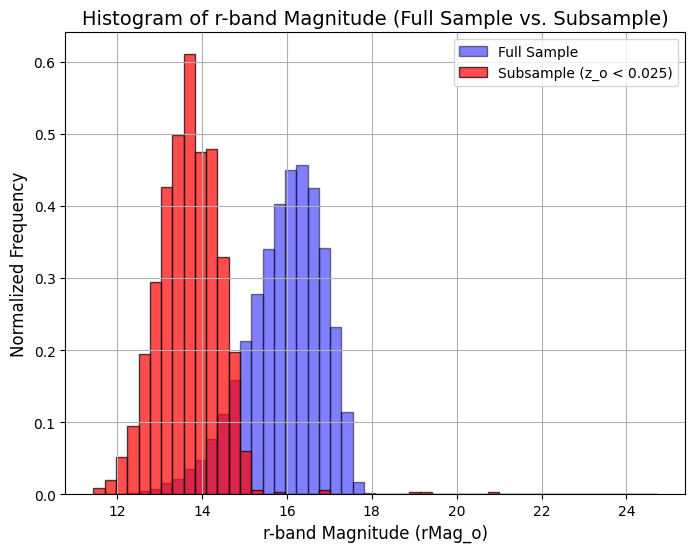

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Prompt to upload the new file
uploaded = files.upload()  # This will prompt you to upload "NEW LBAT3DATA.csv"

# Load updated dataset
file_path = "NEW LBAT3DATA.csv"  # Assuming the uploaded file is named this
df = pd.read_csv(file_path)

# Inspect the first few rows to check column names
print(df.head())

# Define column names (update if necessary)
redshift_flag_column = "Red Shift Parameter"  # The new binary column (or update if needed)
magnitude_column = "rMag_o"  # r-band magnitude column

# Extract full sample and actual subset using the flag
full_sample = df[magnitude_column]
subset_sample = df[df[redshift_flag_column] == 1][magnitude_column]

# Define consistent bins based on full sample
bins = np.histogram(full_sample, bins=50)[1]

# Plot histogram with overlayed subset
plt.figure(figsize=(8, 6))
plt.hist(full_sample, bins=bins, alpha=0.5, label="Full Sample", color="blue", edgecolor="black", density=True)
plt.hist(subset_sample, bins=bins, alpha=0.7, label="Subsample (z_o < 0.025)", color="red", edgecolor="black", density=True)

# Formatting
plt.xlabel("r-band Magnitude (rMag_o)", fontsize=12)
plt.ylabel("Normalized Frequency", fontsize=12)
plt.title("Histogram of r-band Magnitude (Full Sample vs. Subsample)", fontsize=14)
plt.legend()
plt.grid()

# Show the plot
plt.show()

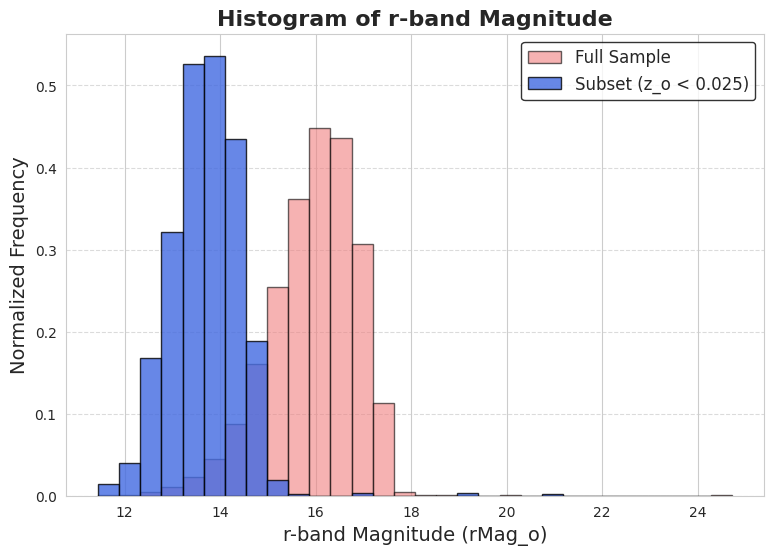

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load updated dataset
file_path = "NEW LBAT3DATA.csv"  # Update this if the filename changed
df = pd.read_csv(file_path)

# Define column names
redshift_flag_column = "Red Shift Parameter"  # Binary flag column
magnitude_column = "rMag_o"  # r-band magnitude column

# Extract full sample and subset
full_sample = df[magnitude_column]
subset_sample = df[df[redshift_flag_column] == 1][magnitude_column]

# Define consistent bins
bins = np.histogram(full_sample, bins=30)[1]  # Adjusted to 30 bins for clarity

# Set seaborn style for better aesthetics
sns.set_style("whitegrid")

# Create histogram
plt.figure(figsize=(9, 6))
plt.hist(full_sample, bins=bins, alpha=0.6, label="Full Sample", color="lightcoral", edgecolor="black", density=True)
plt.hist(subset_sample, bins=bins, alpha=0.8, label="Subset (z_o < 0.025)", color="royalblue", edgecolor="black", density=True)

# Formatting
plt.xlabel("r-band Magnitude (rMag_o)", fontsize=14)
plt.ylabel("Normalized Frequency", fontsize=14)
plt.title("Histogram of r-band Magnitude", fontsize=16, fontweight='bold')

# Customize legend
plt.legend(loc="upper right", fontsize=12, frameon=True, edgecolor="black")

# Display gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()